Pandas 
========================

We live in a world that is full of data.  Some of this data is captured and stored, some of it is not.  Howeverm
we have seen that overtime the amount and type of data that has become available to us continues to grow.  This
allows us to be able to better understand and picture the world around us.  But this picture may not be as clear
to someone else as it could be to you or me.  We need someway to easily present this data, so help to share our
understanding of the data and to enable us to `Tell a Story`.  

Why do we want to spend our time having our data `tell a story`?  Stories have an imporant impact on us as people,
they are a mechanism that we use to either relate one experience with another.  They can allow us to be more
connected with each other.  They can also take more complex scenarios and break them down to thoughts and ideas
that are more easily expressed.  Finally, for me, stories are more memerable and as such have a longer lasting effect.  

Pandas provides a number of tools to help us better understand data, analyze data and finally to create a
story from our data.  

In this notebook I am going to duplicate an article that was created from the website `FiveThirtyEight` to
demonstrate how they created a story from data, and how you can use pandas to do the same thing.  

To start, lets import the modules that we need for this demo.  

In [1]:
import pandas as pd

from ml_course.util.downloader import download_data

## Our Data

The first thing that we need to do is to see what data is available to us.  Now the data the has been provided by
fivethirtyeight cam from a survey that they did on `SurveyMonkey`.  It is very, very important that we try to understand
the data's source so that we can make sure that the data is not biased or misleading.  

In this case the data was collected from a poll ran using `SurveyMonkey`'s audience tool.  This leads me to question a 
few things.  

1. Since they are online, are they a more technical than the average person?
2. Are people who are more technical more likely to watch scifi films?
3. What is that age range of those people that took the survey?
...

They do share some of these findings (namely gender differences where 85% of males having seen at least one star wars movie
compared to 72% of women).  But we just want to make sure that, from the start, the data might be biased and we understand how
and whether that will have an impact in our conclusions.  

Lets start by downloading the dataset. 

In [2]:
star_wars_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
star_wars_file = download_data(star_wars_url, 'star_wars.csv')

#
File downloaded to /home/jovyan/project/ml_course/util/../../.data/star_wars.csv


So at this point we should have our star wars file downloaded (which is a csv).  

Let's start by quickly loading and looking over our data.  

In [3]:
star_wars = pd.read_csv(star_wars_file, encoding='LATIN-1')[1:]
print(f'Survey participant count: {len(star_wars)}')
star_wars.columns = list(range(len(star_wars.columns)))
star_wars.drop(columns=[0, *list(range(15, 29)), 35, 36, 37], inplace=True)

star_wars.columns = ['seen_any', 'is_fan', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'rank_e1', 'rank_e2', 'rank_e3', 'rank_e4', 'rank_e5', 'rank_e6',
                    'shot_first', 'expanded', 'expanded_fan', 'trek_fan', 'gender', 'age']

star_wars.head(2)

Survey participant count: 1186


,seen_any,is_fan,e1,e2,e3,e4,e5,e6,rank_e1,rank_e2,rank_e3,rank_e4,rank_e5,rank_e6,shot_first,expanded,expanded_fan,trek_fan,gender,age
1,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,I don't understand this question,Yes,No,No,Male,18-29
2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29


The first thing that we want to see is how many of the people have seen the different films.  

In [4]:
df = pd.DataFrame(star_wars)
watched_columns = list(df.columns[2:8])
for column in watched_columns:
    df.loc[pd.notna(df[column]), column] = True
    df[column].fillna(False, inplace=True)
    df.loc[:, column] = pd.to_numeric(df[column])

seen_any = df[df['seen_any'] == 'Yes']
seen_any.loc[:, watched_columns].sum().plot.barh(title='Which `Star Wars` Movies have you seen?', figsize=(10, 5))

So we can see that most people have seen episode 5 followed closedly by episode 6 and then, surpisingly, episode 1.  

Now that we have the movies that people have seen, lets see which one is the best.  We will determine this by selecting
only the people who have seen all 6 films and who filled out the ranking section of the survey. 

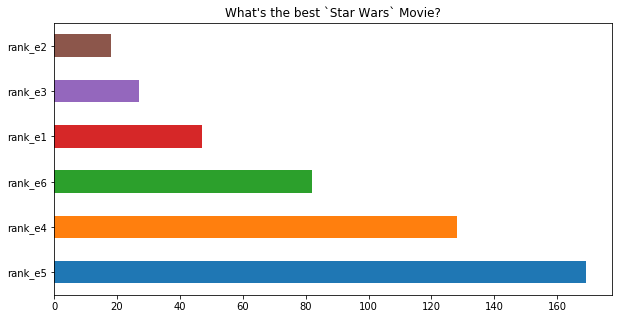

In [5]:
seen_all = pd.DataFrame(df[df[watched_columns].all(axis=1)])
ranking_columns = list(df.columns[8:14])

for column in ranking_columns:
    seen_all.loc[:, column] = pd.to_numeric(seen_all[column])

favorite_films = seen_all[ranking_columns].idxmin(axis=1)
favorite_films.value_counts().plot.barh(title="What's the best `Star Wars` Movie?", figsize=(10, 5))

So looking over the data we can see that episode 5 (_Empire Strikes Back_) is the number one ranked movie by those who took the survey
and had seen all 6 episodes.  

## Story Conclusion

So what does this tell us?  Star wars never should have had the first 3 episodes!  (Ok this might be a bit biased).  

For a couple of final points, lets see how many people know `Who shot first` as well as how many of them consider themselves fans
of both the star wars universe and the star trek universe.  

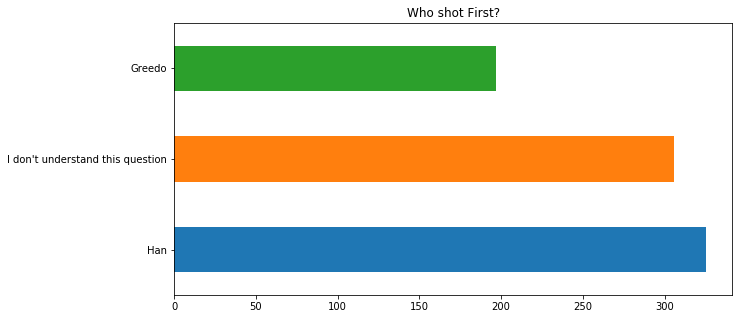

In [6]:
shot_first = df[pd.notna(df['shot_first'])]
shot_first['shot_first'].value_counts().plot.barh(title='Who shot First?', figsize=(10,5))

In [7]:
scifi_fans = df[(df['is_fan'] == 'Yes') & (df['trek_fan'] == 'Yes')]
print('How many people consider themselves fans of both star wars and star trek: ')
len(scifi_fans)

How many people consider themselves fans of both star wars and star trek: 


370

## References

- [FiveThirtyEight Article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/)
